An object of class Seurat 
22849 features across 10139 samples within 1 assay 
Active assay: RNA (22849 features, 0 variable features)

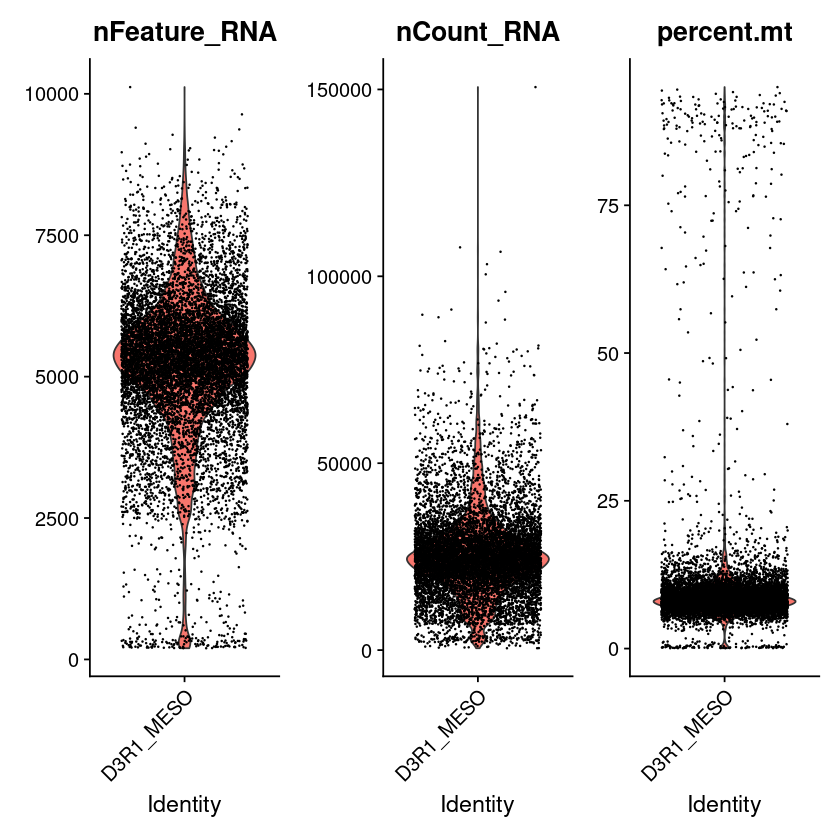

In [5]:
library(dplyr)
library(Seurat)
library(patchwork)

# importing data 
D3R1_MESO.data <- Read10X(data.dir = "/volume/DAY_0/D3R1_MESO/D3R1_MESO_DATA")
D3R1_MESO <- CreateSeuratObject(counts = D3R1_MESO.data, project = "D3R1_MESO", min.cells = 3, min.features = 200)
D3R1_MESO

# Violin Plot
D3R1_MESO[["percent.mt"]] <- PercentageFeatureSet(D3R1_MESO, pattern = "^MT-")

VlnPlot(D3R1_MESO, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

# SUBSET DATA
D3R1_MESO <- subset(D3R1_MESO, subset = nFeature_RNA > 2000 & nFeature_RNA < 8250 & percent.mt < 20)

# SAVE
saveRDS(D3R1_MESO, file = "/volume/DAY_0/D3R1_MESO/D3R1_MESO_final.rds")